### 1. Import claims_data.csv and cust_data.csv which is provided to you and
### combine the two datasets appropriately to create a 360-degree view of
### the data. Use the same for the subsequent questions.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
import scipy.stats as stats

In [7]:
df_claims=pd.read_csv('F:/analytix_labs/5. Pandas Case Study 3 - Insurance Claims Case Study/claims.csv')
df_cust_demo=pd.read_csv('F:/analytix_labs/5. Pandas Case Study 3 - Insurance Claims Case Study/cust_demographics.csv')

In [8]:
df_cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
CUST_ID        1085 non-null int64
gender         1085 non-null object
DateOfBirth    1085 non-null object
State          1085 non-null object
Contact        1085 non-null object
Segment        1085 non-null object
dtypes: int64(1), object(5)
memory usage: 51.0+ KB


In [9]:
df_cust_final=pd.merge(df_cust_demo,df_claims,left_on ='CUST_ID' , right_on ='customer_id' , how ='right')

In [10]:
df_cust_final.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


### 2. Perform a data audit for the datatypes and find out if there are any
### mismatch within the current datatypes of the columns and their
### business significance.

In [11]:
df_cust_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 16 columns):
CUST_ID                1085 non-null float64
gender                 1085 non-null object
DateOfBirth            1085 non-null object
State                  1085 non-null object
Contact                1085 non-null object
Segment                1085 non-null object
claim_id               1100 non-null int64
customer_id            1100 non-null int64
incident_cause         1100 non-null object
claim_date             1100 non-null object
claim_area             1100 non-null object
police_report          1100 non-null object
claim_type             1100 non-null object
claim_amount           1035 non-null object
total_policy_claims    1090 non-null float64
fraudulent             1100 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 146.1+ KB


In [12]:
df_cust_final['DateOfBirth']=np.where(pd.DatetimeIndex(pd.to_datetime(df_cust_final.DateOfBirth,format='%d-%b-%y')).year> pd.datetime.now().year,pd.to_datetime(df_cust_final.DateOfBirth,format='%d-%b-%y')+pd.DateOffset(years=-100),pd.to_datetime(df_cust_final.DateOfBirth,format='%d-%b-%y'))

In [13]:
df_cust_final['claim_date']=pd.to_datetime(df_cust_final.claim_date,format='%m/%d/%Y')

In [14]:
df_claims.total_policy_claims[df_claims.total_policy_claims.isnull() == 1]

29     NaN
272    NaN
281    NaN
365    NaN
450    NaN
458    NaN
468    NaN
489    NaN
732    NaN
1042   NaN
Name: total_policy_claims, dtype: float64

In [15]:
df_cust_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 16 columns):
CUST_ID                1085 non-null float64
gender                 1085 non-null object
DateOfBirth            1085 non-null datetime64[ns]
State                  1085 non-null object
Contact                1085 non-null object
Segment                1085 non-null object
claim_id               1100 non-null int64
customer_id            1100 non-null int64
incident_cause         1100 non-null object
claim_date             1100 non-null datetime64[ns]
claim_area             1100 non-null object
police_report          1100 non-null object
claim_type             1100 non-null object
claim_amount           1035 non-null object
total_policy_claims    1090 non-null float64
fraudulent             1100 non-null object
dtypes: datetime64[ns](2), float64(2), int64(2), object(10)
memory usage: 146.1+ KB


### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [16]:
df_cust_final['claim_amount']=df_cust_final.claim_amount.str.replace('$','').astype('float64')

In [17]:
df_cust_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 16 columns):
CUST_ID                1085 non-null float64
gender                 1085 non-null object
DateOfBirth            1085 non-null datetime64[ns]
State                  1085 non-null object
Contact                1085 non-null object
Segment                1085 non-null object
claim_id               1100 non-null int64
customer_id            1100 non-null int64
incident_cause         1100 non-null object
claim_date             1100 non-null datetime64[ns]
claim_area             1100 non-null object
police_report          1100 non-null object
claim_type             1100 non-null object
claim_amount           1035 non-null float64
total_policy_claims    1090 non-null float64
fraudulent             1100 non-null object
dtypes: datetime64[ns](2), float64(3), int64(2), object(9)
memory usage: 146.1+ KB


### 4. Of all the injury claims, some of them have gone unreported with the
### police. Create an alert flag (1,0) for all such claims.

In [18]:
df_cust_final.claim_type.unique()

array(['Material only', 'Injury only', 'Material and injury'],
      dtype=object)

In [19]:
df_cust_final.police_report.unique()

array(['No', 'Unknown', 'Yes'], dtype=object)

In [20]:
df_cust_final['Alert_Flag']=np.where((df_cust_final.claim_type=='Injury only') & (df_cust_final.police_report=='No'),1,0)

In [21]:
df_cust_final.Alert_Flag.unique()

array([0, 1], dtype=int64)

In [22]:
df_cust_final.head(10)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Alert_Flag
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0
2,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0
3,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0
4,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0
5,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,0
6,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,0
7,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,0
8,21831191.0,Male,1977-05-17,NH,419-712-8513,Gold,24050443,21831191,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,1
9,21831191.0,Male,1977-05-17,NH,419-712-8513,Gold,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No,0


### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [23]:
df_cust_final['Dup_id']=df_cust_final.customer_id.duplicated()

In [24]:
df_cust_final.Dup_id

0       False
1       False
2       False
3        True
4       False
        ...  
1095    False
1096    False
1097    False
1098    False
1099    False
Name: Dup_id, Length: 1100, dtype: bool

In [25]:
df_cust_final.loc[(df_cust_final.Dup_id == True),['customer_id','Dup_id','claim_date']]

,customer_id,Dup_id,claim_date
3,30308357,True,2018-04-04
5,47830476,True,2017-04-12
7,19269962,True,2018-09-26
9,21831191,True,2018-02-09
622,84147585,True,2018-04-10
624,85357756,True,2018-06-23
626,53539195,True,2018-10-03


In [26]:
df_cust_final=df_cust_final.sort_values(['customer_id', 'claim_date']).drop_duplicates('customer_id', keep='last')

In [27]:
df_cust_final.drop(columns='Dup_id',inplace=True)

In [28]:
df_cust_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 188 to 747
Data columns (total 17 columns):
CUST_ID                1078 non-null float64
gender                 1078 non-null object
DateOfBirth            1078 non-null datetime64[ns]
State                  1078 non-null object
Contact                1078 non-null object
Segment                1078 non-null object
claim_id               1093 non-null int64
customer_id            1093 non-null int64
incident_cause         1093 non-null object
claim_date             1093 non-null datetime64[ns]
claim_area             1093 non-null object
police_report          1093 non-null object
claim_type             1093 non-null object
claim_amount           1028 non-null float64
total_policy_claims    1083 non-null float64
fraudulent             1093 non-null object
Alert_Flag             1093 non-null int32
dtypes: datetime64[ns](2), float64(3), int32(1), int64(2), object(9)
memory usage: 149.4+ KB


In [29]:
df_cust_final.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Alert_Flag
188,154557.0,Female,1978-05-23,DE,962-879-1238,Platinum,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,NaN,1.0,Yes,1
836,263204.0,Male,1972-12-20,TX,173-892-6314,Silver,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.0,1.0,Yes,0
677,287476.0,Male,1988-07-28,FL,364-598-1549,Silver,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.5,2.0,Yes,0
828,441097.0,Male,1971-08-19,CA,187-348-8375,Gold,89833962,441097,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.0,1.0,No,0
509,524545.0,Female,1980-08-10,NC,798-862-5398,Gold,35782742,524545,Other driver error,2018-07-27,Auto,No,Injury only,35250.0,3.0,No,1


### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [30]:
df_cust_final['claim_amount']=np.where(df_cust_final.claim_amount.isnull()== True,df_cust_final.claim_amount.mean(),df_cust_final.claim_amount)

In [31]:
df_cust_final['total_policy_claims']=np.where(df_cust_final.total_policy_claims.isnull() == True,df_cust_final.total_policy_claims.mean(),df_cust_final.total_policy_claims)

In [32]:
df_cust_final.total_policy_claims.isnull().value_counts()

False    1093
Name: total_policy_claims, dtype: int64

In [33]:
df_cust_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 188 to 747
Data columns (total 17 columns):
CUST_ID                1078 non-null float64
gender                 1078 non-null object
DateOfBirth            1078 non-null datetime64[ns]
State                  1078 non-null object
Contact                1078 non-null object
Segment                1078 non-null object
claim_id               1093 non-null int64
customer_id            1093 non-null int64
incident_cause         1093 non-null object
claim_date             1093 non-null datetime64[ns]
claim_area             1093 non-null object
police_report          1093 non-null object
claim_type             1093 non-null object
claim_amount           1093 non-null float64
total_policy_claims    1093 non-null float64
fraudulent             1093 non-null object
Alert_Flag             1093 non-null int32
dtypes: datetime64[ns](2), float64(3), int32(1), int64(2), object(9)
memory usage: 149.4+ KB


### 7. Calculate the age of customers in years. Based on the age, categorize the
### customers according to the below criteria
### Children < 18
### Youth 18-30
### Adult 30-60
### Senior > 60

In [34]:
df_cust_final['Age']=pd.datetime.now().year - pd.DatetimeIndex(df_cust_final.DateOfBirth).year

In [35]:
df_cust_final.Age.fillna(0,inplace=True)

In [36]:
df_cust_final['Age']=df_cust_final.Age.astype('int64')

In [37]:
df_cust_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 188 to 747
Data columns (total 18 columns):
CUST_ID                1078 non-null float64
gender                 1078 non-null object
DateOfBirth            1078 non-null datetime64[ns]
State                  1078 non-null object
Contact                1078 non-null object
Segment                1078 non-null object
claim_id               1093 non-null int64
customer_id            1093 non-null int64
incident_cause         1093 non-null object
claim_date             1093 non-null datetime64[ns]
claim_area             1093 non-null object
police_report          1093 non-null object
claim_type             1093 non-null object
claim_amount           1093 non-null float64
total_policy_claims    1093 non-null float64
fraudulent             1093 non-null object
Alert_Flag             1093 non-null int32
Age                    1093 non-null int64
dtypes: datetime64[ns](2), float64(3), int32(1), int64(3), object(9)
memory usage: 15

In [38]:
age_label = ['Children', 'Youth', 'Adult', 'Senior']
age_grp= [0, 18, 30, 60,100]

In [39]:
df_cust_final['Age_Grp']=pd.cut(df_cust_final.Age, bins=age_grp,labels=age_label)

In [40]:
df_cust_final.head(10)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Alert_Flag,Age,Age_Grp
188,154557.0,Female,1978-05-23,DE,962-879-1238,Platinum,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12475.499514,1.0,Yes,1,42,Adult
836,263204.0,Male,1972-12-20,TX,173-892-6314,Silver,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0,48,Adult
677,287476.0,Male,1988-07-28,FL,364-598-1549,Silver,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,0,32,Adult
828,441097.0,Male,1971-08-19,CA,187-348-8375,Gold,89833962,441097,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,0,49,Adult
509,524545.0,Female,1980-08-10,NC,798-862-5398,Gold,35782742,524545,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,1,40,Adult
1048,608461.0,Male,1994-12-17,AR,963-187-2873,Platinum,7180084,608461,Crime,2018-07-14,Auto,No,Material only,2630.000000,1.0,No,0,26,Youth
246,684748.0,Male,1977-08-03,AK,613-385-2863,Gold,7238381,684748,Other driver error,2018-07-14,Auto,No,Material only,2920.000000,2.0,No,0,43,Adult
179,804961.0,Female,1997-12-07,AL,487-723-4167,Gold,87184588,804961,Other causes,2017-10-10,Auto,No,Material and injury,21190.000000,1.0,No,0,23,Youth
1000,885337.0,Male,1962-02-17,HI,321-534-5263,Platinum,86240106,885337,Driver error,2017-07-01,Auto,No,Material only,2490.000000,2.0,No,0,58,Adult
405,1123356.0,Female,1960-07-29,OR,736-725-9481,Silver,50906515,1123356,Crime,2018-08-23,Auto,No,Material only,2507.000000,5.0,Yes,0,60,Adult


In [41]:
df_cust_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 188 to 747
Data columns (total 19 columns):
CUST_ID                1078 non-null float64
gender                 1078 non-null object
DateOfBirth            1078 non-null datetime64[ns]
State                  1078 non-null object
Contact                1078 non-null object
Segment                1078 non-null object
claim_id               1093 non-null int64
customer_id            1093 non-null int64
incident_cause         1093 non-null object
claim_date             1093 non-null datetime64[ns]
claim_area             1093 non-null object
police_report          1093 non-null object
claim_type             1093 non-null object
claim_amount           1093 non-null float64
total_policy_claims    1093 non-null float64
fraudulent             1093 non-null object
Alert_Flag             1093 non-null int32
Age                    1093 non-null int64
Age_Grp                1078 non-null category
dtypes: category(1), datetime64[ns](2),

### 8. What is the average amount claimed by the customers from various segments?

In [42]:
df_cust_final.pivot_table(index='claim_type',values='claim_amount',aggfunc ='mean')

,claim_amount
claim_type,
Injury only,25912.164075
Material and injury,28135.663878
Material only,2743.004534


### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [43]:
pd.to_datetime('2018-10-01')-pd.to_timedelta(20,unit='d')

Timestamp('2018-09-11 00:00:00')

In [44]:
df_cust_final.loc[(df_cust_final.claim_date <= '2018-10-01') & 
                  (df_cust_final.claim_date >=pd.to_datetime('2018-10-01')-pd.to_timedelta(20,unit='d')),
                  ['customer_id','incident_cause','claim_amount',
                   'claim_date']].pivot_table(index='incident_cause',values='claim_amount',aggfunc ='sum')

,claim_amount
incident_cause,
Crime,6840.000000
Driver error,14605.499514
Natural causes,8418.000000
Other causes,247231.499514
Other driver error,47599.500000


### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [45]:
df_cust_final.loc[((df_cust_final.State == 'TX')|(df_cust_final.State == 'AK')|(df_cust_final.State == 'DE'))& 
                  ((df_cust_final.incident_cause=='Driver error')|(df_cust_final.incident_cause=='Other driver error')) & 
                  (df_cust_final.Age_Grp=='Adult')].customer_id.count()

29

### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [46]:
df_pie=df_cust_final.pivot_table(index='claim_type',columns='gender',values=
                          'claim_amount',aggfunc='sum')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B005A48>,
      dtype=object)

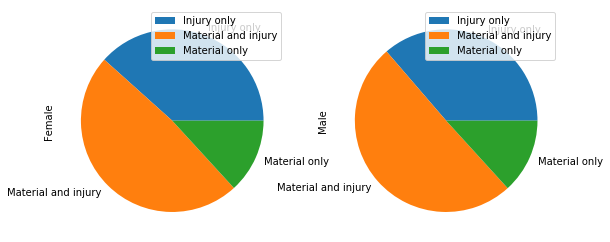

In [47]:
df_pie.plot.pie(subplots=True,figsize=(9,9))

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

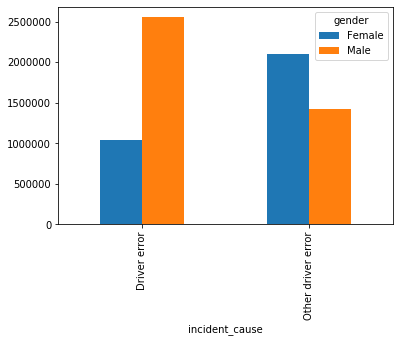

In [48]:
df_cust_final[(df_cust_final.incident_cause=='Driver error')|
                     (df_cust_final.incident_cause=='Other driver error')].pivot_table(index='incident_cause',columns='gender',values=
                          'claim_amount',aggfunc='sum').plot(kind='bar')

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

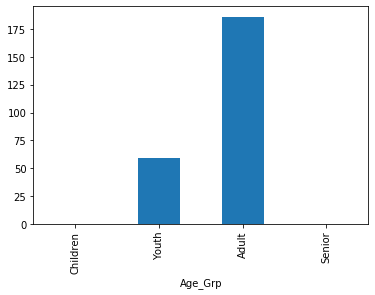

In [49]:
df_cust_final[df_cust_final.fraudulent == 'Yes'].groupby('Age_Grp').fraudulent.count().plot(kind='bar')

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [50]:
df_cust_final['claim_Mn']=pd.DatetimeIndex(df_cust_final.claim_date).month

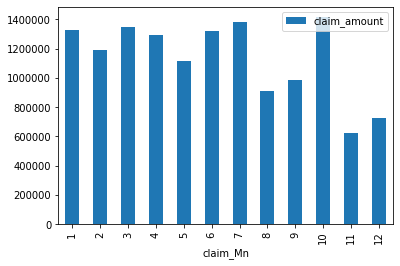

In [51]:
df_cust_final.pivot_table(index='claim_Mn',values='claim_amount',aggfunc='sum').plot(kind='bar')

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [52]:
df_facet=df_cust_final.pivot_table(index='Age_Grp',columns=['gender','fraudulent'],values='claim_amount',aggfunc='mean').reset_index()

In [53]:
df_facet=df_cust_final.groupby(['Age_Grp','gender','fraudulent']).claim_amount.mean().reset_index()

In [54]:
df_facet['claim_amount']=df_facet.claim_amount.fillna(0)

In [55]:
df_facet

,Age_Grp,gender,fraudulent,claim_amount
0,Children,Female,No,0.000000
1,Children,Female,Yes,0.000000
2,Children,Male,No,0.000000
3,Children,Male,Yes,0.000000
4,Youth,Female,No,13064.795432
5,Youth,Female,Yes,8704.351780
6,Youth,Male,No,12172.393487
7,Youth,Male,Yes,11470.406220
8,Adult,Female,No,12149.270525
9,Adult,Female,Yes,11804.275480


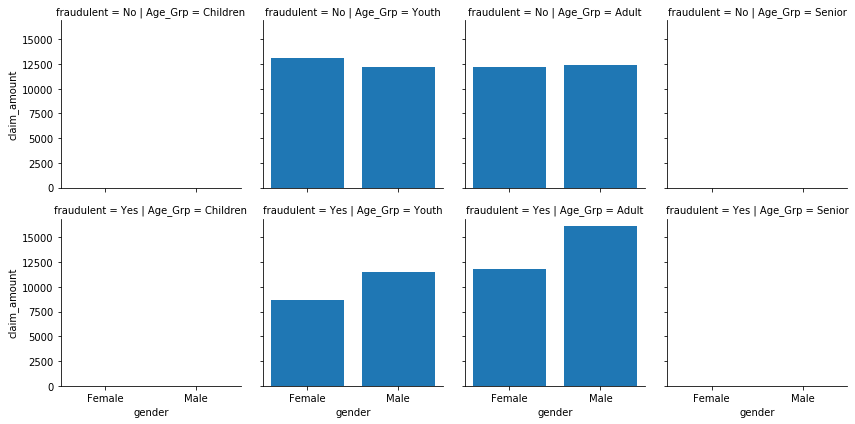

In [56]:
g = sns.FacetGrid(df_facet, col='Age_Grp',row='fraudulent')
g=g.map(plt.bar,'gender','claim_amount')

### 16. Is there any similarity in the amount claimed by males and females?

In [57]:
df_cust_final.corr()

,CUST_ID,claim_id,customer_id,claim_amount,total_policy_claims,Alert_Flag,Age,claim_Mn
CUST_ID,1.000000,0.072254,1.000000,-0.049259,-0.013242,0.046627,0.013685,0.033526
claim_id,0.072254,1.000000,0.077472,0.044327,-0.016231,-0.001458,0.038109,-0.003441
customer_id,1.000000,0.077472,1.000000,-0.048712,-0.013366,0.046346,0.009068,0.029158
claim_amount,-0.049259,0.044327,-0.048712,1.000000,-0.023909,0.229751,0.003052,0.001227
total_policy_claims,-0.013242,-0.016231,-0.013366,-0.023909,1.000000,0.024485,-0.036922,0.027045
Alert_Flag,0.046627,-0.001458,0.046346,0.229751,0.024485,1.000000,0.030682,-0.004251
Age,0.013685,0.038109,0.009068,0.003052,-0.036922,0.030682,1.000000,-0.030787
claim_Mn,0.033526,-0.003441,0.029158,0.001227,0.027045,-0.004251,-0.030787,1.000000


In [58]:
df_cust_final.pivot_table(columns='gender',values='claim_amount',aggfunc=['mean','std'])

mean                         std             
gender              Female          Male        Female         Male
claim_amount  12099.717241  12883.131547  13147.758201  13565.91065

In [59]:
### Null Hypothesis : Ho -> The claim amount of male and female are similar
### Alternate Hypothesis Ha -> The claim amount of male and female are not similar
### Confidence Interval 95%

In [60]:
df_male=df_cust_final[df_cust_final.gender == 'Male'].claim_amount

In [61]:
df_female=df_cust_final[df_cust_final.gender == 'Female'].claim_amount

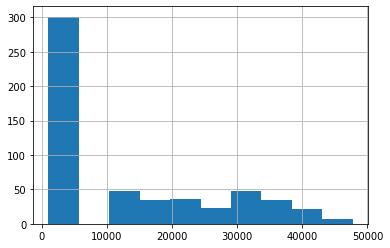

In [62]:
df_male.hist()

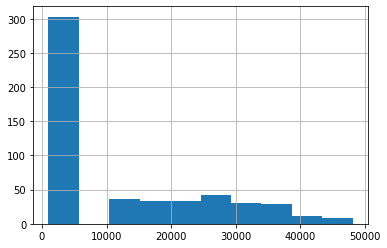

In [63]:
df_female.hist()

### Two sample T-Test (Independent)

In [64]:
stats.ttest_ind(a = df_male,
                b = df_female)

Ttest_indResult(statistic=0.9621769389700356, pvalue=0.33617690369982145)

In [65]:
### Conclusion : As p value is high I accept the null hypothesis,hence the claim amount of male and female are similar

### 17. Is there any relationship between age category and segment?

In [66]:
df_cust_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 188 to 747
Data columns (total 20 columns):
CUST_ID                1078 non-null float64
gender                 1078 non-null object
DateOfBirth            1078 non-null datetime64[ns]
State                  1078 non-null object
Contact                1078 non-null object
Segment                1078 non-null object
claim_id               1093 non-null int64
customer_id            1093 non-null int64
incident_cause         1093 non-null object
claim_date             1093 non-null datetime64[ns]
claim_area             1093 non-null object
police_report          1093 non-null object
claim_type             1093 non-null object
claim_amount           1093 non-null float64
total_policy_claims    1093 non-null float64
fraudulent             1093 non-null object
Alert_Flag             1093 non-null int32
Age                    1093 non-null int64
Age_Grp                1078 non-null category
claim_Mn               1093 non-null in

In [67]:
df_cust_final.Segment

188    Platinum
836      Silver
677      Silver
828        Gold
509        Gold
         ...   
698      Silver
999        Gold
72       Silver
936        Gold
747    Platinum
Name: Segment, Length: 1093, dtype: object

In [68]:
### Null Hypothesis : Ho -> The age category and Segment are independent
### Alternate Hypothesis Ha -> The age category and Segment are dependent
### Confidence Interval 95%

### Chi-squre Test

In [69]:
obs_freq = df_cust_final.pivot_table(index = 'Segment', columns = 'Age_Grp', 
                 values = 'customer_id', aggfunc = 'count')

In [70]:
obs_freq

Age_Grp,Youth,Adult
Segment,,
Gold,88,283
Platinum,101,260
Silver,88,258


In [71]:
stats.chi2_contingency(observed = obs_freq)

(1.7559082572247033,
 0.41563237282050425,
 2,
 array([[ 95.33116883, 275.66883117],
        [ 92.76159555, 268.23840445],
        [ 88.90723562, 257.09276438]]))

In [72]:
### for DOF =2 and p value 0.415, the Test (X2) value  1.75 < X2 critical value ~ 2.85
### Hence I will accept Null Hypothesis, ie the age category and Segment are independent

### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [73]:
### Null Hypothesis : Ho -> The claim amount current year <= claim amount 2016-2017 fiscal average
### Alternate Hypothesis Ha -> The claim amount current year > claim amount 2016-2017 fiscal average
### Confidence Interval 95%

In [74]:
df_cust_final['claim_Yr']=pd.DatetimeIndex(df_cust_final.claim_date).year

In [75]:
df_cust_final.loc[df_cust_final.claim_Yr == 2018].claim_amount.mean()

12679.392242811045

In [76]:
stats.ttest_1samp(a= df_cust_final.loc[df_cust_final.claim_Yr == 2018].claim_amount,               # Sample data
                 popmean= 10000)

Ttest_1sampResult(statistic=4.4147704931665, pvalue=1.2444078618606088e-05)

In [70]:
### As p value is low, I am rejecting the null hypothesis. 

In [3]:
### Conclusion ,The claim amount current year > claim amount 2016-2017 fiscal average

### 19. Is there any difference between age groups and insurance claims?

In [72]:
### Null Hypothesis : Ho -> There is a relation between age groups and insurance claims
### Alternate Hypothesis Ha -> There is a diffrence in insurance claims with age groups
### Confidence Interval 95%

In [78]:
df_youth=df_cust_final.claim_amount[df_cust_final.Age_Grp=='Youth']

In [79]:
df_adult=df_cust_final.claim_amount[df_cust_final.Age_Grp=='Adult']

In [80]:
stats.f_oneway(df_youth,df_adult)

F_onewayResult(statistic=0.32143613001056975, pvalue=0.5708641075297693)

In [81]:
print(df_adult.mean(),df_adult.std())

12635.880121273503 13421.084626825395


In [82]:
print(df_youth.mean(),df_youth.std())

12107.640762617819 13208.52350579521


In [83]:
stats.ttest_ind(a= df_youth,
                b= df_adult)

Ttest_indResult(statistic=-0.5669533755173957, pvalue=0.5708641075296615)

In [79]:
### As p value is high , I will accept the null hypothesis

In [80]:
### Conclusion : There is relation between age groups and insurance claims

### 20. Is there any relationship between total number of policy claims and the claimed amount?

In [84]:
stats.pearsonr(df_cust_final.total_policy_claims, df_cust_final.claim_amount)

(-0.023908971978697457, 0.42973091875449343)

In [85]:
### Conclusion there is week negative correlation or no relation between total number of policy claims and the claimed amount

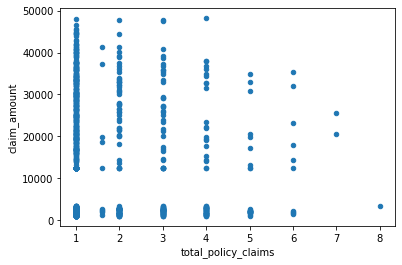

In [86]:
df_cust_final.plot.scatter(x='total_policy_claims',y='claim_amount')